## Classification of Markov Chain States Using Matrix Powers

In [1]:
import numpy as np
import pandas as pd

# Define the transition matrix P
P = np.array([
    [0, 0, 1/4, 1/4, 1/2, 0, 0],
    [0, 0, 2/5, 2/5, 1/5, 0, 0],
    [0, 0, 0, 0, 1/4, 3/4, 0],
    [0, 0, 0, 0, 1/2, 1/2, 0],
    [0, 0, 0, 0, 1/3, 2/3, 0],
    [2/3, 1/3, 0, 0, 0, 0, 0],
    [1/4, 3/4, 0, 0, 0, 0, 0]
])

# Create a Pandas DataFrame for better visualization of P
P_df = pd.DataFrame(P, columns=['A', 'B', 'C', 'D', 'E', 'F', 'G'], index=['A', 'B', 'C', 'D', 'E', 'F', 'G'])
print("Transition Matrix P:")
print(P_df)

# Calculate P^2 and P^3
P2 = np.dot(P, P)
P3 = np.dot(P2, P)

# Create DataFrames for P^2 and P^3 for better visualization
P2_df = pd.DataFrame(P2, columns=['A', 'B', 'C', 'D', 'E', 'F', 'G'], index=['A', 'B', 'C', 'D', 'E', 'F', 'G'])
P3_df = pd.DataFrame(P3, columns=['A', 'B', 'C', 'D', 'E', 'F', 'G'], index=['A', 'B', 'C', 'D', 'E', 'F', 'G'])

print("\nP^2 Matrix:")
print(P2_df)

print("\nP^3 Matrix:")
print(P3_df)

# Calculate P + P^2 + P^3
P_sum = P + P2 + P3

# Create a DataFrame for P + P^2 + P^3 for better visualization
P_sum_df = pd.DataFrame(P_sum, columns=['A', 'B', 'C', 'D', 'E', 'F', 'G'], index=['A', 'B', 'C', 'D', 'E', 'F', 'G'])

print("\nP + P^2 + P^3 Matrix:")
print(P_sum_df)

# The classification based on the matrix P + P^2 + P^3 can be done by observing the entries
# A state is recurrent if it has non-zero probabilities of returning to itself
# It is transient if it can't return to itself

# Display the classification as a summary
classification = {}
for state in P_sum_df.columns:
    recurrent = 'Yes' if np.any(P_sum_df[state] > 0) else 'No'
    classification[state] = recurrent

print("\nState Classification (Recurrent or Transient):")
print(classification)

Transition Matrix P:
          A         B     C     D         E         F    G
A  0.000000  0.000000  0.25  0.25  0.500000  0.000000  0.0
B  0.000000  0.000000  0.40  0.40  0.200000  0.000000  0.0
C  0.000000  0.000000  0.00  0.00  0.250000  0.750000  0.0
D  0.000000  0.000000  0.00  0.00  0.500000  0.500000  0.0
E  0.000000  0.000000  0.00  0.00  0.333333  0.666667  0.0
F  0.666667  0.333333  0.00  0.00  0.000000  0.000000  0.0
G  0.250000  0.750000  0.00  0.00  0.000000  0.000000  0.0

P^2 Matrix:
          A         B       C       D         E         F    G
A  0.000000  0.000000  0.0000  0.0000  0.354167  0.645833  0.0
B  0.000000  0.000000  0.0000  0.0000  0.366667  0.633333  0.0
C  0.500000  0.250000  0.0000  0.0000  0.083333  0.166667  0.0
D  0.333333  0.166667  0.0000  0.0000  0.166667  0.333333  0.0
E  0.444444  0.222222  0.0000  0.0000  0.111111  0.222222  0.0
F  0.000000  0.000000  0.3000  0.3000  0.400000  0.000000  0.0
G  0.000000  0.000000  0.3625  0.3625  0.275000  0.00

## Graph Visualization

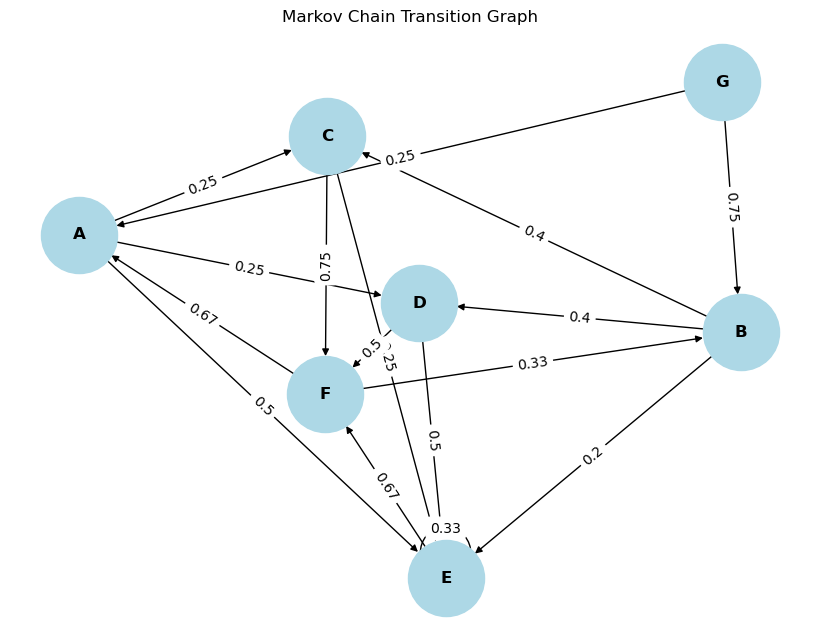

In [9]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes for states A, B, C, D, E, F, G
states = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
G.add_nodes_from(states)

# Add edges with transition probabilities
for i, state_from in enumerate(states):
    for j, state_to in enumerate(states):
        if P[i, j] > 0:  # Only add edges where the probability is greater than 0
            G.add_edge(state_from, state_to, weight=round(P[i, j], 2))

# Draw the graph
pos = nx.spring_layout(G)  # Position the nodes
plt.figure(figsize=(8, 6))

# Draw the network with edge labels
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", font_size=12, font_weight="bold", arrows=True)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Markov Chain Transition Graph")
plt.show()